# Dynamic Optimal Rod Cutting Algorithm

#### In this simulation experiment, I have evaluated two rod cutting strategies. As length remaining of bar and billet length changes and depends on several parameters we have to run our algorithm dynamically to determine optimal cut strategy. In this experiment we have shown how the dynamic rod cutting strategy maximizes profit.

In [1]:
#initialization of libraries and bar_price array 
import numpy as np
from matplotlib import pyplot as plt
import math as m
#creating bar prices
bar_price =[0,0,0,4,5,7,10,10,10,10,10,15]
print(bar_price)
print(len(bar_price))

[0, 0, 0, 4, 5, 7, 10, 10, 10, 10, 10, 15]
12


In [2]:
_rod_length= 1000 #in m for testing purpose
_total_cuts = 1000/72
print(_total_cuts)
_total_sections = m.ceil(_total_cuts)
print(_total_sections)
_last_three_cut_length = _rod_length - ((_total_sections-3)*72)
print(_last_three_cut_length) 
def greedy_value():
    remaining_value= _total_cuts - int(_total_cuts)
    length_m = 72*remaining_value
    print(length_m)
    profit = int(_total_cuts)*6*bar_price[11] + int(length_m/12)*bar_price[11] 
    rest_length_scrap= length_m  - int(length_m/12)*12
    print (rest_length_scrap)
    profit = profit + bar_price[int(rest_length_scrap)]
    return profit
#we have to apply our optimizations in last three cuts
print(greedy_value())




13
13.0
280.0
0
0
1170


In [6]:
# Two different algos for cutting strategy
memoized_array = np.zeros(12)
def dynamic(_cut_length_p):
    if(_cut_length_p<=0):
        return 0
    max_p=-24500
    for i in range(12):
        if(memoized_array[i]==0):
            max_p=max(max_p,bar_price[i]+dynamic(_cut_length_p-i-1))
        else:
            break;
    if(memoized_array[i]==0):
        memoized_array[i]=max_p
    return max_p
def greedy(cut_length):
    _12_m = int(cut_length/12)*bar_price[11]
    rest_len = cut_length - int(cut_length/12)*12
    if(rest_len==0):
        _profit= _12_m
    else:
        _profit= _12_m + bar_price[int(rest_len)-1]
    return _profit

#-----------Test Bed------------------
#testing for different set of values
_profit_array_greedy =[]
_profit_array_dynamic=[]
for i in range(1,20):
    _profit_array_greedy.append(greedy(i))
    _profit_array_dynamic.append(dynamic(i))
    
        

        
        
    

# Visualizing Results

[15, 10, 10, 10, 14, 15, 17, 20, 20, 20, 21, 24, 25, 27, 30, 30, 30, 31, 34]
[0, 0, 0, 4, 5, 7, 10, 10, 10, 10, 10, 15, 15, 15, 15, 19, 20, 22, 25]


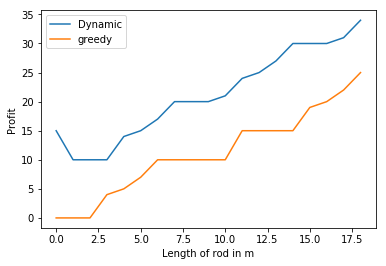

In [7]:
print(_profit_array_dynamic)
print(_profit_array_greedy)
plt.plot(_profit_array_dynamic,label='Dynamic')
plt.plot(_profit_array_greedy,label='greedy')
plt.xlabel('Length of rod in m')
plt.ylabel('Profit')
plt.legend()
plt.show()


# Quantifying Results

In [16]:
percentage_improvement_over_greedy =[]
for i in range(6,19):
    diff = _profit_array_dynamic[i]-_profit_array_greedy[i]
    
    percentage_improvement_over_greedy.append((float(diff)/_profit_array_greedy[i])*100)
print('Percentage Improvement Over Greedy : ',percentage_improvement_over_greedy,"\n")
print("Assuming We have sufficient demand for all type rods, i.e. Prime,Short length and Scrap")
avg=sum(percentage_improvement_over_greedy)/len(percentage_improvement_over_greedy)
print("Maximum Average gain in profit only = ",avg,"%")
#----------Probalistic Analysis---------------
# let we have demand efficiency varying from 1 to 10%
# then avg maximum gain 
effective_gain=[]
for i in range(1,11):
    effective_gain.append(i*avg/100)
effective_avg=sum(effective_gain)/len(effective_gain)
print("Assuming We do not have sufficient demand for all type rods, i.e. Prime,Short length and Scrap. Customers have preference \
      of Prime over others. Let this demand efficieny varies from 1 to 10% as maximum customers want Prime rods only.\n")

print("Maximum Average Effective gain in profit only = "+str(effective_avg)+" %")

('Percentage Improvement Over Greedy : ', [70.0, 100.0, 100.0, 100.0, 110.00000000000001, 60.0, 66.66666666666666, 80.0, 100.0, 57.89473684210527, 50.0, 40.909090909090914, 36.0], '\n')
Assuming We have sufficient demand for all type rods, i.e. Prime,Short length and Scrap
('Maximum Average gain in profit only = ', 74.72849957060484, '%')
Assuming We do not have sufficient demand for all type rods, i.e. Prime,Short length and Scrap. Customers have preference       of Prime over others. Let this demand efficieny varies from 1 to 10% as maximum customers want Prime rods only.

Maximum Average Effective gain in profit only = 4.11006747638 %
